# Modelling

In [ ]:
# TULIS KODE ANDA DISINI
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))

# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 250, 250, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 125, 125, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 63, 63, 64)       

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
model.save('model.h5')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlystopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", mode="min", verbose=1, patience=10, min_delta=0.0001, factor=0.2)

In [ ]:
H = model.fit_generator(
    train_generator, 
    epochs=100, 
    validation_data= validation_generator,
    callbacks=[earlystopping, reduce_lr]
    )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 63s 3s/step - loss: 1.6450 - acc: 0.4992 - val_loss: 12.0318 - val_acc: 0.1755
Epoch 2/100
20/20 [==============================] - 63s 3s/step - loss: 1.5026 - acc: 0.5072 - val_loss: 9.9977 - val_acc: 0.1707
Epoch 3/100
20/20 [==============================] - 63s 3s/step - loss: 1.4419 - acc: 0.5279 - val_loss: 9.2302 - val_acc: 0.1947
Epoch 4/100
20/20 [==============================] - 63s 3s/step - loss: 1.3601 - acc: 0.5566 - val_loss: 10.1651 - val_acc: 0.1923
Epoch 5/100
20/20 [==============================] - 63s 3s/step - loss: 1.3151 - acc: 0.5710 - val_loss: 13.9349 - val_acc: 0.1394
Epoch 6/100
20/20 [==============================] - 64s 3s/step - loss: 1.2180 - acc: 0.5933 - val_loss: 8.1126 - val_acc: 0.1971
Epoch 7/100
20/20 [==============================] - 63s 3s/step - loss: 1.0629 - acc: 0.6300 - val_loss: 7.9168 - val_acc: 0.2524
Epoch 8/100
20/20 [==============================] - 63s 3s/step - loss: 0.9774 

In [ ]:
model.save('MammalsAugmentasiMaxPool.h5')

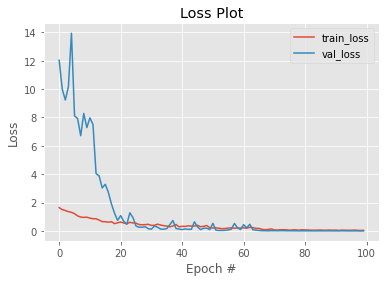

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

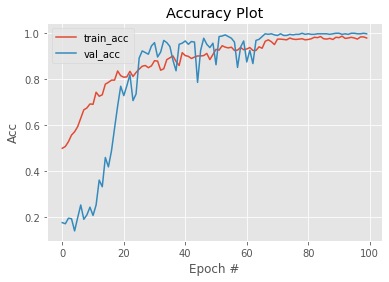

In [ ]:
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

Accuracy: 98.88%


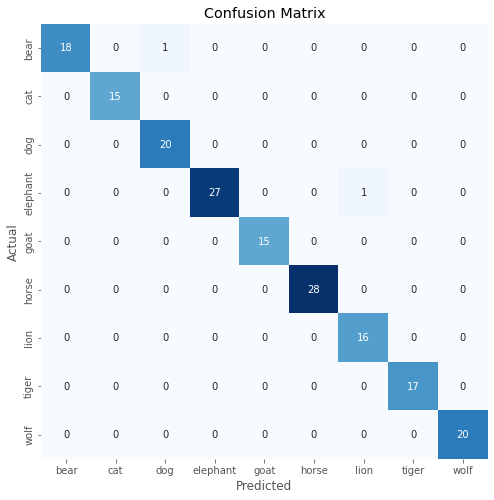

Classification Report:
----------------------
               precision    recall  f1-score   support

        bear       1.00      0.95      0.97        19
         cat       1.00      1.00      1.00        15
         dog       0.95      1.00      0.98        20
    elephant       1.00      0.96      0.98        28
        goat       1.00      1.00      1.00        15
       horse       1.00      1.00      1.00        28
        lion       0.94      1.00      0.97        16
       tiger       1.00      1.00      1.00        17
        wolf       1.00      1.00      1.00        20

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



In [ ]:
import seaborn as sns
target_name = ['bear', 'cat', 'dog', 'elephant', 'goat', 'horse', 'lion', 'tiger', 'wolf']
acc = model.evaluate(test_generator, verbose=0)
print("Accuracy: {:.2f}%".format(acc[1] * 100))

predictions = np.argmax(model.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8], target_names=target_name)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], labels=target_name)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], labels=target_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
# Scenario Modelling 2
# Feature Extraction Layer
Model = Sequential()

Model.add(InputLayer(input_shape=[250,250,3]))
Model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
Model.add(BatchNormalization())
Model.add(AveragePooling2D(pool_size=2, padding='same'))
Model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
Model.add(BatchNormalization())
Model.add(AveragePooling2D(pool_size=2, padding='same'))
Model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
Model.add(BatchNormalization())
Model.add(AveragePooling2D(pool_size=2, padding='same'))
Model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
Model.add(BatchNormalization())
Model.add(AveragePooling2D(pool_size=2, padding='same'))
Model.add(Dropout(0.25))
Model.add(Flatten())

# Fully Connected Layer
Model.add(Dense(512, activation='relu'))
Model.add(Dropout(0.25))
Model.add(Dense(9, activation='softmax'))

# Print model summary
print(Model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
batch_normalization_8 (Batch (None, 250, 250, 16)      64        
_________________________________________________________________
average_pooling2d (AveragePo (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 125, 125, 32)      128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 63, 63, 64)       

In [ ]:
Model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
h = Model.fit_generator(
    train_generator, 
    epochs=100, 
    validation_data= validation_generator,
    callbacks=[earlystopping, reduce_lr]
    )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 66s 3s/step - loss: 1.0603 - acc: 0.6396 - val_loss: 7.2420 - val_acc: 0.1755
Epoch 2/100
20/20 [==============================] - 66s 3s/step - loss: 1.0690 - acc: 0.6491 - val_loss: 8.6763 - val_acc: 0.1683
Epoch 3/100
20/20 [==============================] - 66s 3s/step - loss: 0.8033 - acc: 0.7432 - val_loss: 11.2637 - val_acc: 0.1707
Epoch 4/100
20/20 [==============================] - 66s 3s/step - loss: 0.7836 - acc: 0.7448 - val_loss: 7.2116 - val_acc: 0.2212
Epoch 5/100
20/20 [==============================] - 66s 3s/step - loss: 0.7748 - acc: 0.7703 - val_loss: 8.6288 - val_acc: 0.2476
Epoch 6/100
20/20 [==============================] - 66s 3s/step - loss: 0.7073 - acc: 0.7751 - val_loss: 12.0703 - val_acc: 0.1875
Epoch 7/100
20/20 [==============================] - 66s 3s/step - loss: 0.5980 - acc: 0.8086 - val_loss: 4.0006 - val_acc: 0.3101
Epoch 8/100
20/20 [==============================] - 66s 3s/step - loss: 0.5523 -

In [ ]:
Model.save('MammalsAugmentasiAveragePool.h5')

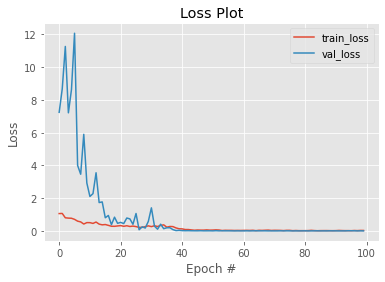

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), h.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

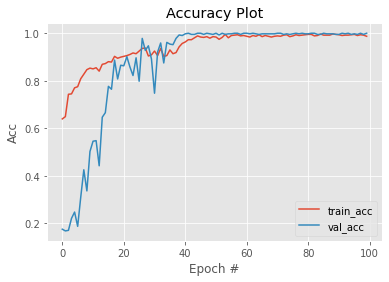

In [ ]:
plt.figure()
plt.plot(np.arange(0, 100), h.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), h.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

Accuracy: 99.44%


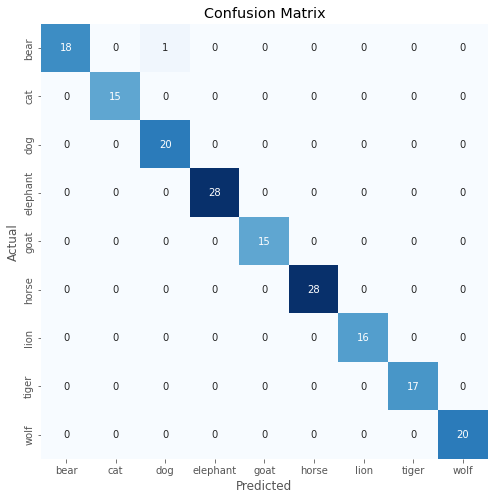

Classification Report:
----------------------
               precision    recall  f1-score   support

        bear       1.00      0.95      0.97        19
         cat       1.00      1.00      1.00        15
         dog       0.95      1.00      0.98        20
    elephant       1.00      1.00      1.00        28
        goat       1.00      1.00      1.00        15
       horse       1.00      1.00      1.00        28
        lion       1.00      1.00      1.00        16
       tiger       1.00      1.00      1.00        17
        wolf       1.00      1.00      1.00        20

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



In [ ]:
import seaborn as sns
target_name = ['bear', 'cat', 'dog', 'elephant', 'goat', 'horse', 'lion', 'tiger', 'wolf']
acc = Model.evaluate(test_generator, verbose=0)
print("Accuracy: {:.2f}%".format(acc[1] * 100))

predictions = np.argmax(Model.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8], target_names=target_name)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], labels=target_name)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], labels=target_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)